In [6]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('offersim_interview.csv')


df.dropna(inplace=True)
df['out_converted'] = df['out_converted'].astype(int)


### EXPLORATORY DATA ANALYSIS


df

In [20]:
df.describe()

,out_converted,act_reward_pts,ctx_like_dish,ctx_add_restuarant,ctx_menu_shares,ctx_delivery_time,ctx_dislike_dish,ctx_remove_restuarant,ctx_view_menu,ctx_place_order
count,19959.000000,19959.000000,19959.000000,19959.000000,19959.000000,19959.000000,19959.000000,19959.000000,19959.000000,19959.000000
mean,0.059522,49.642267,19.896989,7.037527,8.570570,24.663410,3.336490,0.303522,45.045794,15.105917
std,0.236605,29.163992,39.167368,8.778798,16.638295,84.557852,5.099993,0.549452,111.999297,41.999634
min,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,3.000000,2.000000,2.000000,5.000000,1.000000,0.000000,5.000000,1.000000
50%,0.000000,50.000000,9.000000,5.000000,4.000000,17.000000,2.000000,0.000000,15.000000,4.000000
75%,0.000000,70.000000,21.000000,9.000000,10.000000,42.000000,4.000000,1.000000,40.000000,12.000000
max,1.000000,100.000000,1674.000000,259.000000,932.000000,1905.000000,139.000000,4.000000,3546.000000,1474.000000


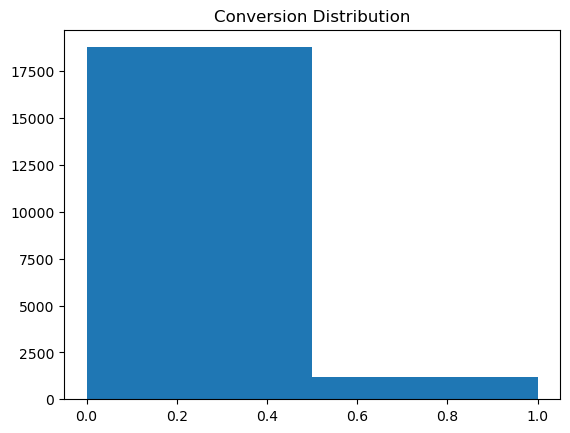

In [21]:
plt.hist(df['out_converted'], bins=2)
plt.title('Conversion Distribution')
plt.show()


### CATEGORICAL FEAT DISTRIBUTION ANALYSIS

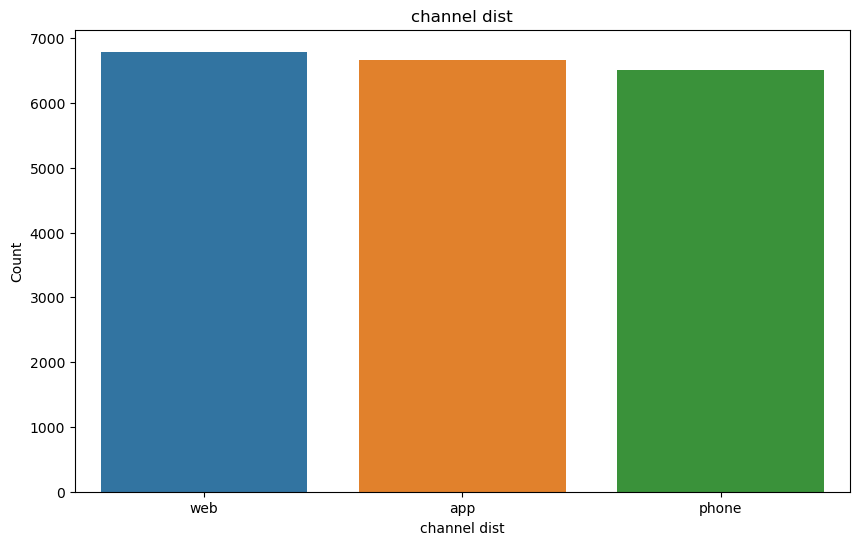

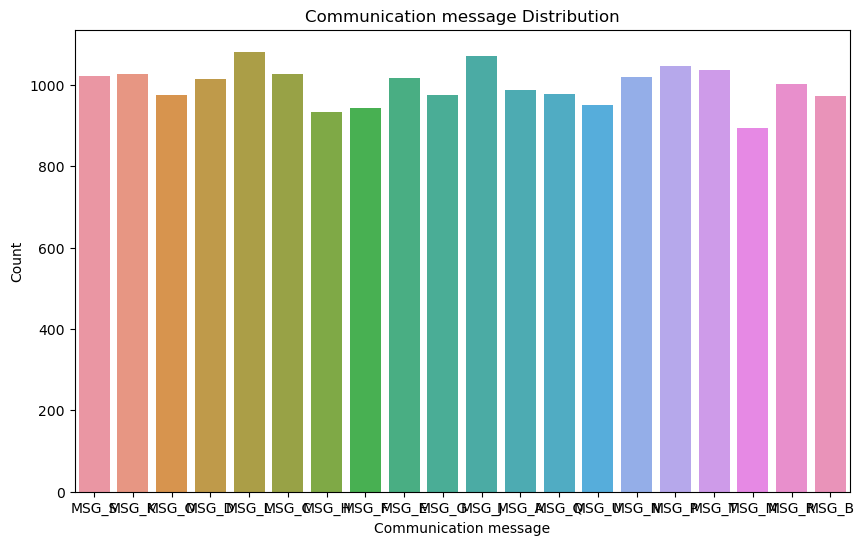

In [22]:

plt.figure(figsize=(10, 6))
sns.countplot(x='act_channel', data=df)
plt.title('channel dist')
plt.xlabel('channel dist')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='act_message', data=df)
plt.title('Communication message Distribution')
plt.xlabel('Communication message')
plt.ylabel('Count')
plt.show()


### NUMERICAL FEATURES ANALYSIS 

In [14]:
df

,out_converted,act_channel,act_message,act_reward_pts,ctx_like_dish,ctx_add_restuarant,ctx_menu_shares,ctx_delivery_time,ctx_dislike_dish,ctx_remove_restuarant,ctx_view_menu,ctx_place_order
0,0,web,MSG_S,50,7,4,4,40,1,0,1.0,1
1,0,app,MSG_K,70,17,5,33,61,2,0,18.0,5
2,0,web,MSG_O,40,11,10,6,34,6,0,2.0,1
3,0,phone,MSG_K,90,16,22,6,17,4,0,52.0,14
4,0,phone,MSG_D,0,44,7,25,51,4,0,11.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
24042,0,app,MSG_D,70,6,0,2,36,1,0,NaN,9
24043,0,phone,MSG_B,30,1,1,4,23,1,0,NaN,1
24044,0,phone,MSG_A,60,9,0,8,15,1,0,17.0,9
24045,0,phone,MSG_A,20,23,15,2,31,3,0,47.0,8


In [25]:
numerical_columns = [col for col in df.columns if col.startswith('ctx')] + ['act_reward_pts']
numerical_columns

['ctx_like_dish',
 'ctx_add_restuarant',
 'ctx_menu_shares',
 'ctx_delivery_time',
 'ctx_dislike_dish',
 'ctx_remove_restuarant',
 'ctx_view_menu',
 'ctx_place_order',
 'act_reward_pts']

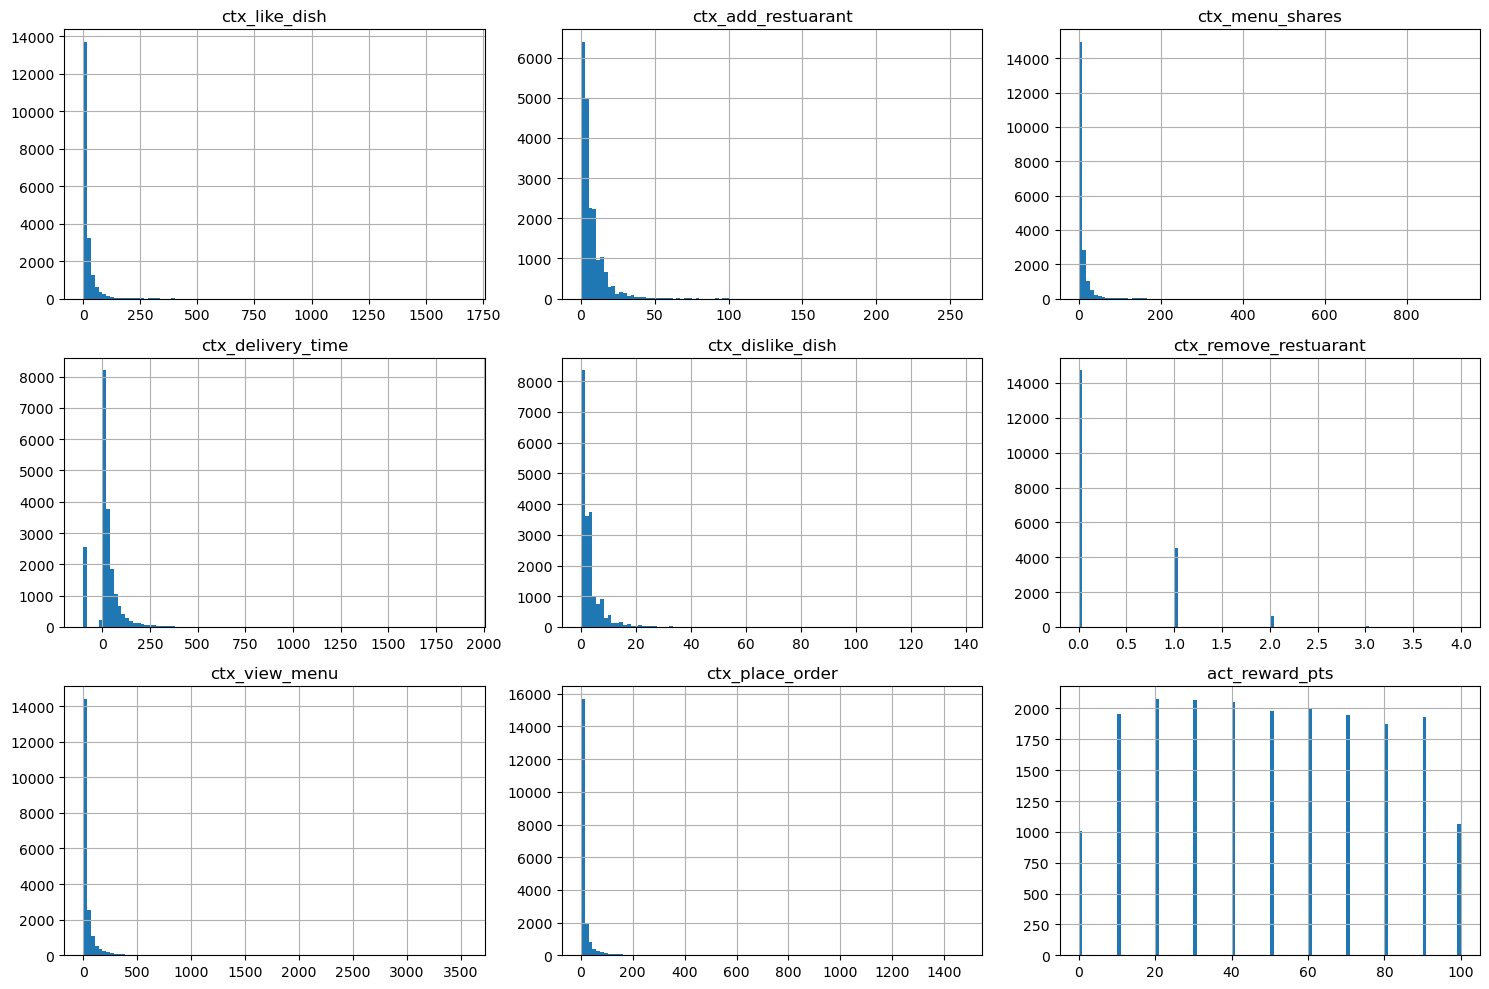

In [32]:
# Histogram for 'income'
# plt.figure(figsize=(10, 6))
# sns.histplot(df['ctx_like_dish'], kde=True)
# plt.title('ctx_like_dish')
# plt.xlabel('ctx_like_dish')
# plt.ylabel('Frequency')
# plt.show()


# Histograms for other numerical features
# num_features = ['age', 'visit_frequency', 'average_spend', 'total_spend', 'offer_duration']
df[numerical_columns].hist(bins=100, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()


/var/folders/rk/v9j31w3d23n224bhh3cm7hm80000gn/T/ipykernel_44829/3010791102.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


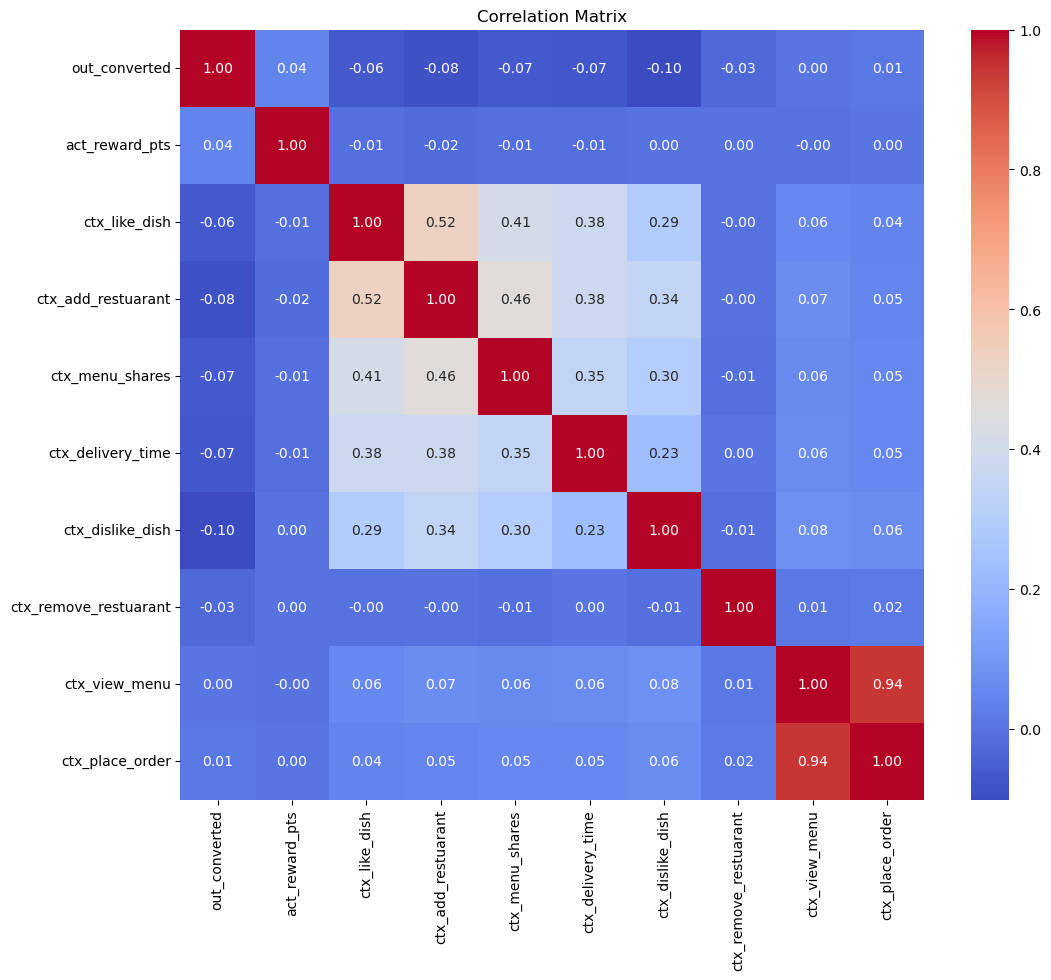

In [33]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### MODELING 


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
cat_columns = ['act_channel', 'act_message']
numerical_columns


X = df[cat_columns + numerical_columns]
y = df['out_converted']


In [38]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, cat_columns)
    ])


In [39]:
model = RandomForestClassifier(random_state=42)

In [40]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ctx_like_dish',
                                                   'ctx_add_restuarant',
                                                   'ctx_menu_shares',
                                                   'ctx_delivery_time',
                                                   'ctx_dislike_dish',
                                                   'ctx_remove_restuarant',
                                                   'ctx_view_menu',
                                                   'ctx_place_order',
                                                   'act_reward_pts']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['act_channel',
                                                   'act_message'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [43]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

###  RESULTS

In [44]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9438877755511023
Confusion Matrix:
[[5636    7]
 [ 329   16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5643
           1       0.70      0.05      0.09       345

    accuracy                           0.94      5988
   macro avg       0.82      0.52      0.53      5988
weighted avg       0.93      0.94      0.92      5988



ROC-AUC: 0.7767925889970131
PR-AUC: 0.27645935990815096


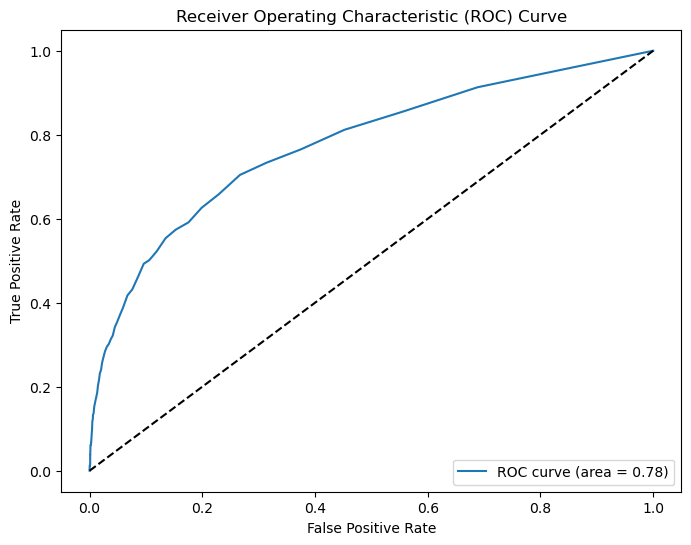

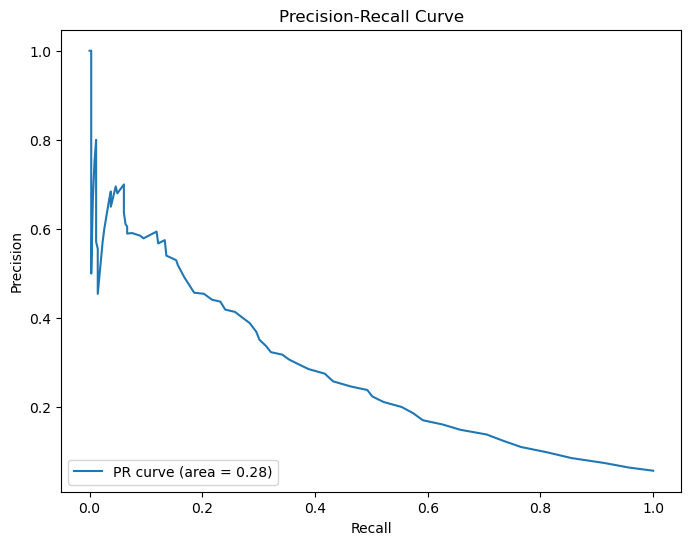

In [45]:
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC-AUC: {roc_auc}')

precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
print(f'PR-AUC: {pr_auc}')

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

### EXPLAINABILITY

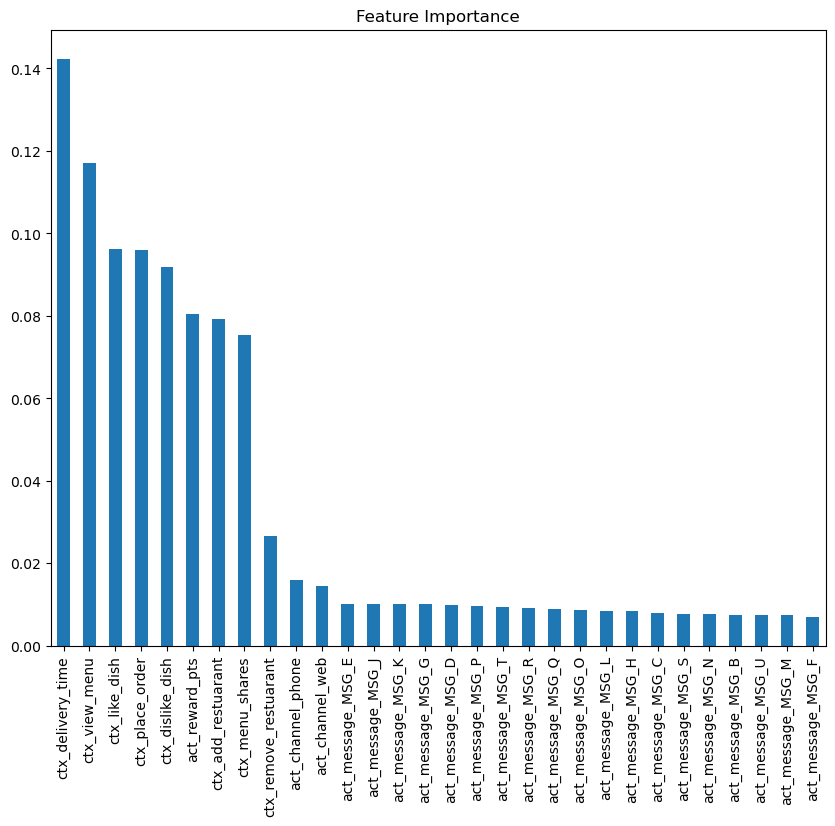

In [47]:
importances = pipeline.named_steps['model'].feature_importances_
features = numerical_columns + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(cat_columns))
feature_importance = pd.Series(importances, index=features)
feature_importance.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

In [113]:
# import shap
# explainer = shap.Explainer(pipeline.named_steps['model'], pipeline.named_steps['preprocessor'].transform(X_test))
# shap_values = explainer(pipeline.named_steps['preprocessor'].transform(X_test))

# X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
# explainer = shap.TreeExplainer(model, X_train_transformed)
# X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)
# shap_values = explainer.shap_values(X_test_transformed, check_additivity=False)



# FINAL MODEL w/ SHAP PLOT

## Please note: Catgeorical columns have been removed, because they are causing issues with the SHAP library (possibly due to OneHotEncoding creating multiple dynamic feature columns)


#### The final dataframe on the cell is a comprehensive view of SHAP values of each feature in each instance of the test dataset. The `feature` column is the name of each feature, `feature_value` is actual value of each feature, while `shap_values` SHAP value of the feature for the specific instance. This indicates how much the feature value contributes to the difference between the base value and the actual prediction for that instance.

Accuracy: 0.9432197728790915
Accuracy: 0.9432197728790915
Confusion Matrix:
[[5617   26]
 [ 314   31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5643
           1       0.54      0.09      0.15       345

    accuracy                           0.94      5988
   macro avg       0.75      0.54      0.56      5988
weighted avg       0.92      0.94      0.92      5988

ROC-AUC: 0.7743868894898642
PR-AUC: 0.26352808837133984


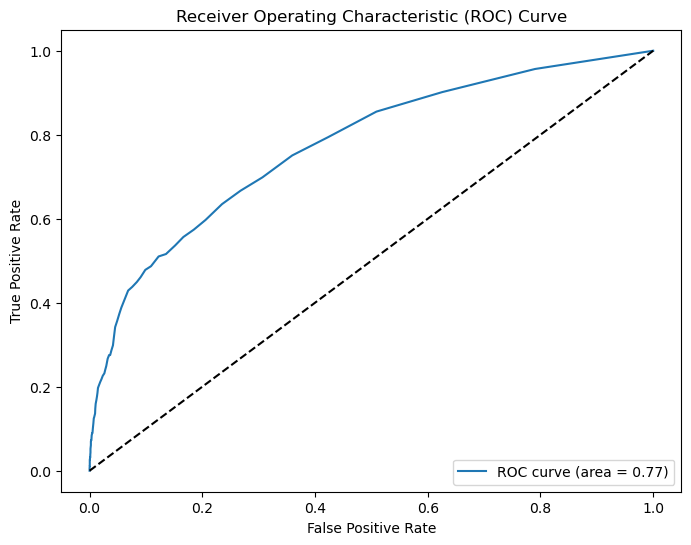

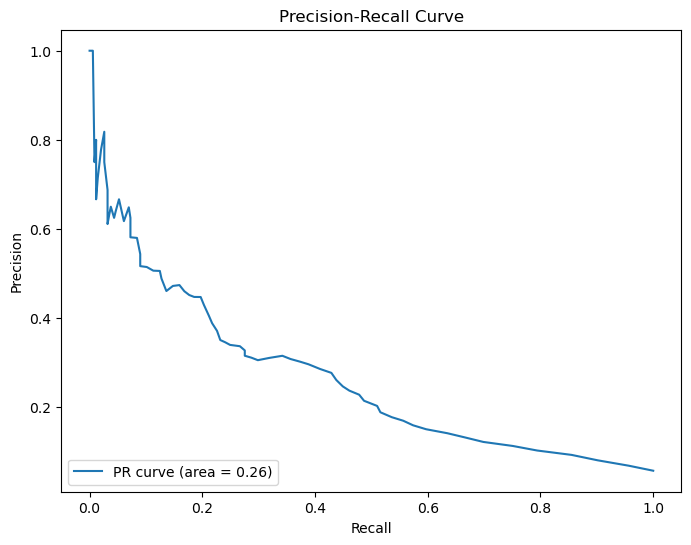

 99%|===================| 11914/11976 [02:53<00:00]        

,row_id,feature,feature_value,base_value,shap_values
0,1177,ctx_like_dish,4.0,0.0576,0.002943
1,1177,ctx_add_restuarant,18.0,0.0576,0.007946
2,1177,ctx_menu_shares,8.0,0.0576,-0.007283
3,1177,ctx_delivery_time,68.0,0.0576,-0.037391
4,1177,ctx_dislike_dish,2.0,0.0576,-0.034522
...,...,...,...,...,...
53887,16351,ctx_dislike_dish,3.0,0.0576,-0.035011
53888,16351,ctx_remove_restuarant,0.0,0.0576,-0.001063
53889,16351,ctx_view_menu,30.0,0.0576,0.004053
53890,16351,ctx_place_order,4.0,0.0576,-0.000984


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

import shap

# Load the dataset
df = pd.read_csv('offersim_interview.csv')

# Drop missing values and ensure the target column is integer
df.dropna(inplace=True)
df['out_converted'] = df['out_converted'].astype(int)

# Identify numerical and categorical columns
numerical_columns = [col for col in df.columns if col.startswith('ctx')] + ['act_reward_pts']
# cat_columns = ['act_channel', 'act_message']

# Extract features and target variable
X = df[numerical_columns]
y = df['out_converted']

# Define the model
model = RandomForestClassifier(random_state=42)


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC-AUC: {roc_auc}')

precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
print(f'PR-AUC: {pr_auc}')

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()




from shap.maskers import Independent
from sklearn.model_selection import train_test_split
from shap import TreeExplainer, Explanation
from shap.plots import waterfall



masker = Independent(X_train, max_samples=100)
explainer = TreeExplainer(model, data=masker)
bv = explainer.expected_value[1]
sv = explainer(X_test, check_additivity=False)

pd.DataFrame({
    'row_id': X_test.index.values.repeat(X_test.shape[1]),
    'feature': X_test.columns.to_list() * X_test.shape[0],
    'feature_value': X_test.values.flatten(),
    'base_value': bv,
    'shap_values': sv.values[:,:,1].flatten()
})



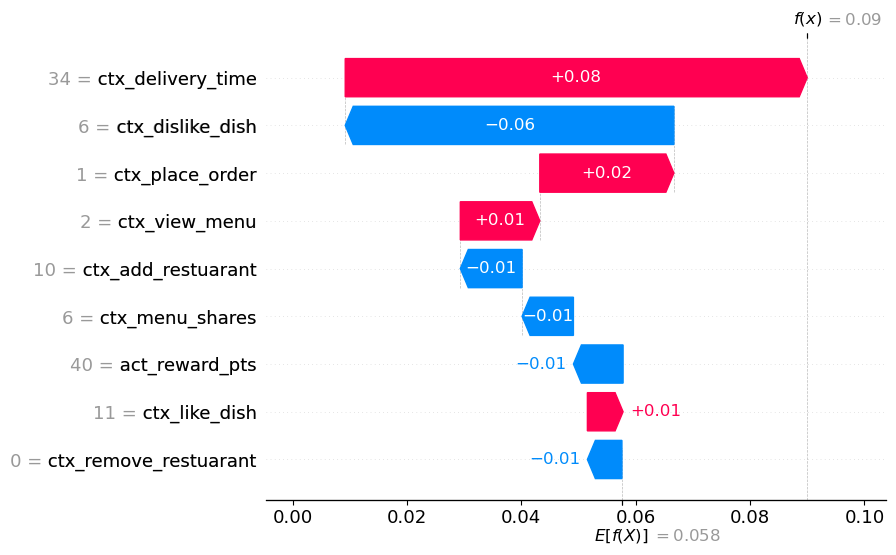

In [4]:
exp = Explanation(sv.values[:,:,1], 
                  sv.base_values[:,1], 
                  data=X.values, 
                  feature_names=X.columns)
idx = 2
waterfall(exp[idx])

In the above instance of test data, we see that the SHAP plot provides a clear visual explanation of how each feature influences the model's prediction for the specific instance. The base value starts at 0.058, and the contributions of individual features adjust this base value to reach the final prediction of 0.09 for this test instance.


Each bar represents the contribution of a feature to the difference between the base value and the final prediction. Positive contributions (features that increase the prediction) are shown in red, while negative contributions (features that decrease the prediction) are shown in blue.

- `ctx_delivery_time`: This feature significantly increases the prediction by +0.08.
- `ctx_dislike_dish`: This feature decreases the prediction by -0.06.
- `ctx_place_order`: This feature increases the prediction by +0.02.
- `ctx_view_menu`: This feature increases the prediction by +0.01.
- `ctx_add_restuarant`: This feature decreases the prediction by -0.01.
- `ctx_menu_shares`: This feature decreases the prediction by -0.01.
- `act_reward_pts`: This feature decreases the prediction by -0.01.
- `ctx_like_dish`: This feature increases the prediction by +0.01.
- `ctx_remove_restuarant`: This feature has a very small negative contribution of -0.01.


Most Influential Features: <br> 

- Positive Impact:
- - - ctx_delivery_time has the largest positive impact, increasing the prediction by +0.08.
- - - ctx_place_order and ctx_view_menu also increase the prediction by +0.02 and +0.01, respectively.
- - - ctx_like_dish contributes positively with +0.01. <br> 

- Negative Impact:
- - - ctx_dislike_dish has the largest negative impact, decreasing the prediction by -0.06.
- - - ctx_add_restuarant, ctx_menu_shares, act_reward_pts, and ctx_remove_restuarant each decrease the prediction by -0.01.